<a href="https://colab.research.google.com/github/elena877/www/blob/main/FemaleIncomeVsEducation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Import the packages you need

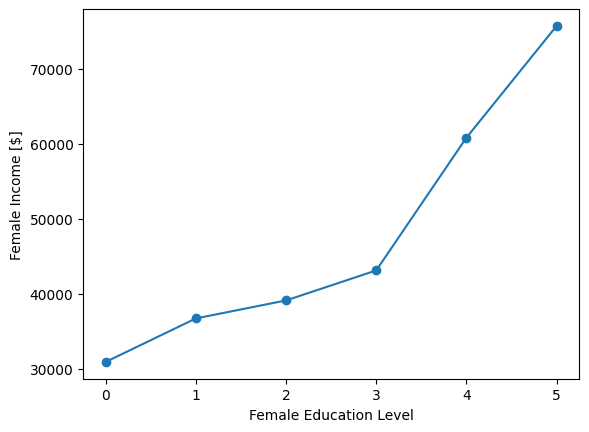

In [3]:
F_income_arr = np.array([30900., 36700., 39100., 43100., 60800., 75700.])
# Don't count the first line in the data table, that gives average income without taking education into account
F_education_arr = np.arange(len(F_income_arr))
plt.plot (F_education_arr, F_income_arr, "o-")
# o- tells python the style of the line ( replacing with ro shows red dots without connecting lines)
plt.xlabel ('Female Education Level')
plt.ylabel ('Female Income [$]')
plt.show ()

In [4]:
#Labelling the education levels!!!!!
F_education_levels = np.array ([
"Less than high school completion",
"High school completion",
"Some college, no degree",
"Associate's degree",
"Bachelor's degree",
"Master's or higher degree"
])

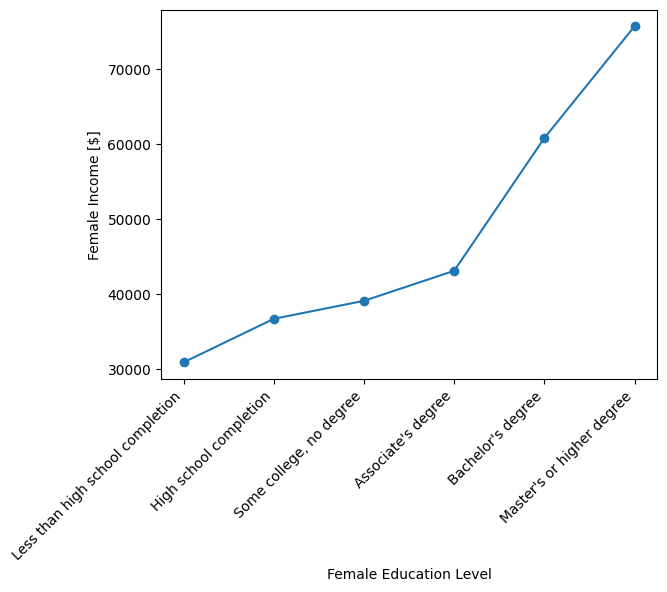

In [5]:
# now plot it again with education levels labelled
plt.plot(F_education_arr,F_income_arr, "o-")
plt.xlabel("Female Education Level")
plt.ylabel("Female Income [$]")
plt.xticks(F_education_arr, F_education_levels, rotation=45, ha="right")
plt.show()


In [6]:
# This fits the data of Female education level compared to female income vale in the closest linear function possible
z_linear = np.polyfit (F_education_arr, F_income_arr, 1)
print ("Slope = ", z_linear[0], "in dollars per level")
print ("Y-intercept = ", z_linear[1], "in dollars per level at 0 or at 'Less than high school completion'")

Slope =  8579.999999999998 in dollars per level
Y-intercept =  26266.666666666653 in dollars per level at 0 or at 'Less than high school completion'


In [10]:
#This fits the data to the closest quadratic function possible
z_quadratic = np.polyfit (F_education_arr, F_income_arr, 2)
print (z_quadratic)
print ("So, female income is represented by the following formula: {:.1f} level^2 + {:.1f} level + {:.1f}" .format (z_quadratic[0], z_quadratic[1], z_quadratic[2]))

[ 1905.35714286  -946.78571429 32617.85714286]
So, female income is represented by the following formula: 1905.4 level^2 + -946.8 level + 32617.9


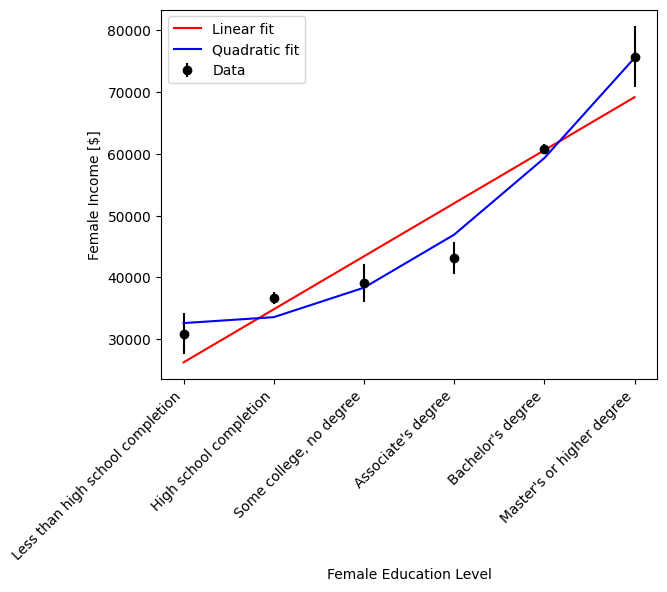

In [14]:
# Now we can compare the accuracy of the linear fit of the data vs the quadratic fit of the data using the chi squared statistic
O = F_income_arr
O_err = np.array ([3310, 960, 3070, 2580, 860, 4940])
C_linear = z_linear [0] * F_education_arr + z_linear [1]
C_quadratic = z_quadratic[0] * F_education_arr**2 + z_quadratic[1] * F_education_arr + z_quadratic [2]

F_income_arr =np.array([30900, 36700, 39100, 43100, 60800, 75700])
F_education_arr = np.arange (len (F_income_arr))
plt.errorbar (F_education_arr, O, yerr=O_err, marker="o", linestyle="none", color = "black", label="Data")
plt.plot (F_education_arr, C_linear, color = "red", label="Linear fit")
plt.plot (F_education_arr, C_quadratic, color = "blue" , label="Quadratic fit")
plt.legend ()
plt.xlabel ("Female Education Level")
plt.ylabel ("Female Income [$]")
plt.xticks (F_education_arr, F_education_levels, rotation=45, ha="right")
plt.show ()

In [15]:
#Calculating the reduced chi2 for each respective fits of the data
n = len(O)
m_linear = 2
m_quadratic = 3
re_chi2_linear = np.sum((O - C_linear)**2 / O_err**2) / (n - m_linear)
print("Reduced Chi2 for linear fit = {:.2f}".format(re_chi2_linear))
re_chi2_quadratic = np.sum((O - C_quadratic)**2 / O_err**2) / (n - m_quadratic)
print("Reduced Chi2 for quadratic fit = {:.2f}".format(re_chi2_quadratic))

Reduced Chi2 for linear fit = 5.35
Reduced Chi2 for quadratic fit = 5.36


In [23]:
# printing the reduced chi2 for each separate education level on the linear function
print((O - C_linear)**2 / O_err**2)

[ 1.95943609  3.72704475  1.98623269 11.91765986  0.06153476  1.74910441]


In [24]:
# printing the reduced chi2 for each separate education level on the quadratic function
print((O - C_quadratic)**2 / O_err**2)

[ 0.2693507  10.58669539  0.06036636  2.19879962  2.97591155  0.00135947]
